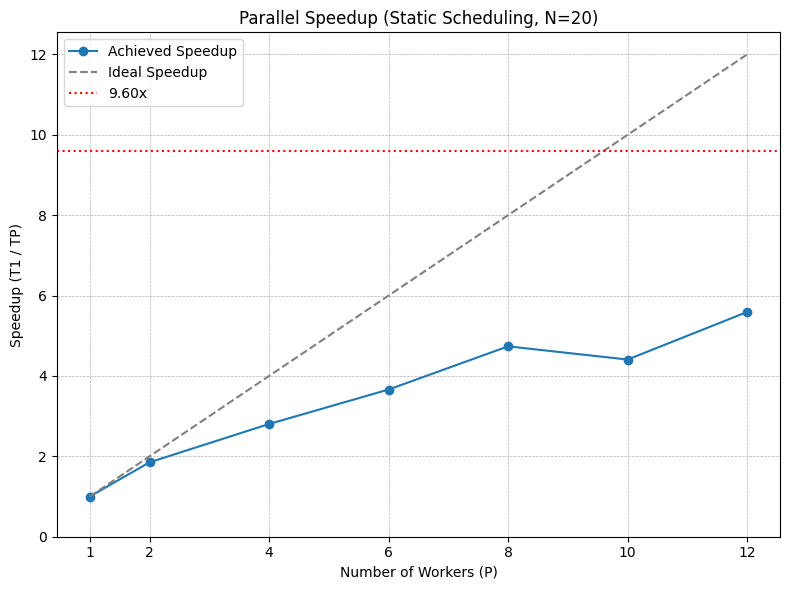

In [1]:
import numpy as np
import matplotlib.pyplot as plt

workers = [1, 2, 4, 6, 8, 10, 12]
runtimes = [217.91, 117.701, 77.702, 59.506, 46.000, 49.436, 38.967]

NUM_FLOORPLANS_TIMED = 20
TOTAL_FLOORPLANS = 4571

p = np.array(workers)
t = np.array(runtimes)

t1 = t[p == 1][0]
speedups = t1 / t

max_achieved_speedup = np.max(speedups)
p_max_achieved = p[np.argmax(speedups)]

f_estimated = (1.0 - 1.0 / max_achieved_speedup) / (1.0 - 1.0 / p_max_achieved)
f_estimated = max(0.0, min(1.0, f_estimated))

if f_estimated < 1.0:
    theoretical_max_speedup = 1.0 / (1.0 - f_estimated)
else:
    theoretical_max_speedup = float('inf')

fastest_runtime = np.min(t)
p_fastest = p[np.argmin(t)]
avg_time_fastest = fastest_runtime / NUM_FLOORPLANS_TIMED
estimated_total_time_s = avg_time_fastest * TOTAL_FLOORPLANS
estimated_total_time_h = estimated_total_time_s / 3600.0

plt.figure(figsize=(8, 6))
plt.plot(p, speedups, marker='o', linestyle='-', label='Achieved Speedup')
plt.plot(p, p, linestyle='--', color='gray', label='Ideal Speedup')

if theoretical_max_speedup != float('inf') and f_estimated > 0:
    plt.axhline(y=theoretical_max_speedup, color='red', linestyle=':', label=f'{theoretical_max_speedup:.2f}x')

plt.title(f'Parallel Speedup (Static Scheduling, N={NUM_FLOORPLANS_TIMED})')
plt.xlabel('Number of Workers (P)')
plt.ylabel('Speedup (T1 / TP)')
plt.xticks(p)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("parallel_scaling")
plt.show()